# 第2章 神经网络的数据基础
## 2.1 初始神经网络 

In [14]:
# 2-1 加载Keras中的MNIST数据集
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [16]:
print(test_images.shape)
print(len(test_labels))
print(train_labels)

(10000, 28, 28)
10000
[5 0 4 ... 5 6 8]


神经网络核心组件是层（layer），这是一种数据处理模块，可以看做是一种数据过滤器。下面例子中是由2个Dense层组成，下面是一个10路softmax层，，返回一个由10个概率值组成的数组。

In [20]:
# 2-2 网络架构
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax') )

In [21]:
# 2-3 编译步骤
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [22]:
# 2-4 准备图像数据
train_images = train_images.reshape((60000,28 * 28 ))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28 * 28 ))
test_images = test_images.astype('float32') / 255

In [23]:
# 2-5 准备标签
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

开始训练网络，调用网络拟合模型fit

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.2556 - acc: 0.9269
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.1022 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0684 - acc: 0.9801
Epoch 4/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.0498 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0375 - acc: 0.9882


测试精度

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc',  test_acc)

10000/10000 [==============================] - 1s 60us/step
test_acc 0.9823


## 2.2 神经网络的数据表示
张量（tensor）是矩阵的任意维度推广，张量的维度（dimension）通常叫做轴（axis）

### 2.2.1 标量（0D张量）
仅包含一个数字的张量叫做标量（scalar），在numpy中，一个float32或者float64就是一个标量，张量的轴（axis）也叫作阶（rank）

In [27]:
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)

12
0


### 2.2.2 向量（1D张量）
数字组成的数组叫向量（vector）

In [29]:
x = np.array([12, 3, 6, 14, 71])
print(x)
print(x.ndim)

[12  3  6 14 71]
1


### 2.2.3（2D张量）
向量组成的数组叫矩阵（matrix）或者二维张量（行和列）。

In [30]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,21]])
print(x)
print(x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36 21]]
2


### 2.2.4 3D张量和更高维张量
将多个矩阵组合合成一个新的数组

In [31]:
x = np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,21]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,21]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,21]]])
print(x)
print(x.ndim)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36 21]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36 21]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36 21]]]
3


### 2.2.5 关键属性

#### 轴的个数ndim
#### 形状shape
#### 数据类型dtype

In [32]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


使用Matplotlib库来显示这个三维张量中的第四个数字

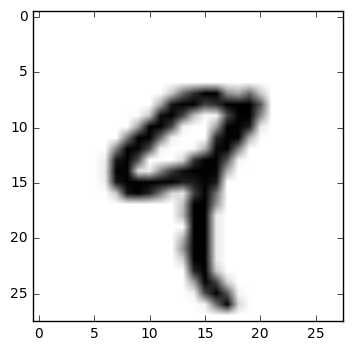

In [34]:
# 2-6 显示第四个数字
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

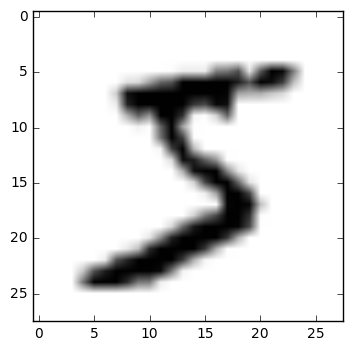

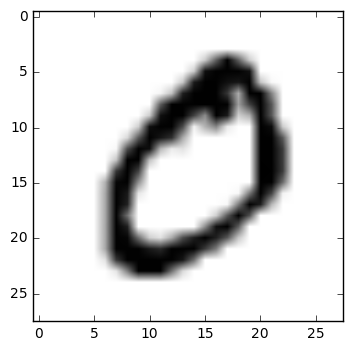

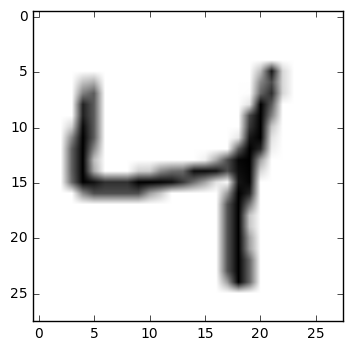

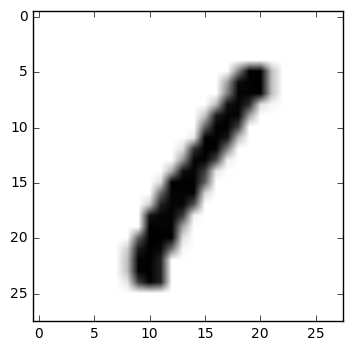

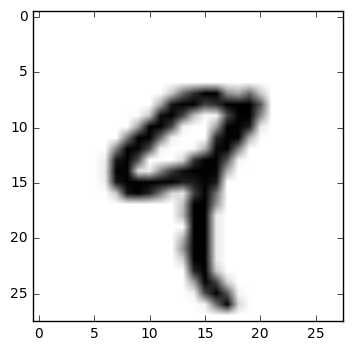

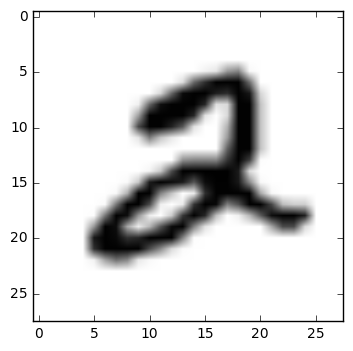

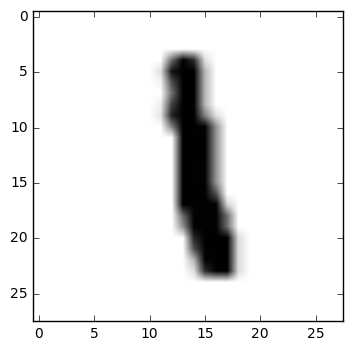

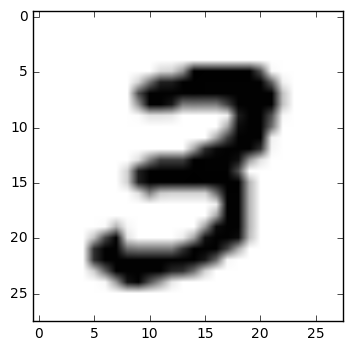

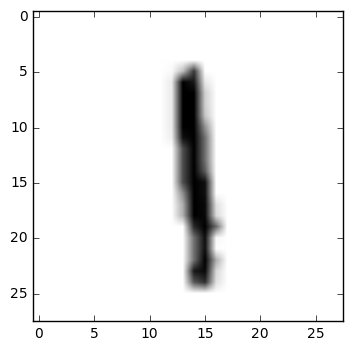

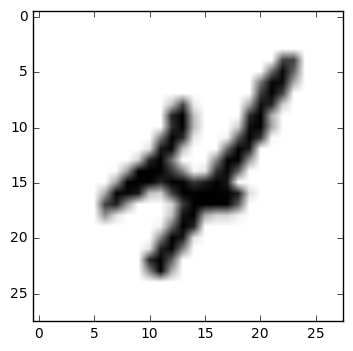

In [36]:
for i in range(10):
    digit = train_images[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

### 2.2.6 在Numpy中操作张量
张量切片train_images[i]

In [40]:
# 下列三种方法等价
my_slice= train_images[10:100]
print(my_slice.shape)
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


train_images第一维数据表示第几张图，第二维和第三维表示图片的像素。例如，选取所有图片右下角的14x14像素区域

In [42]:
my_slice = train_images[:, 14:, 14: ]

也可以使用负数索引，在中心裁剪出14x14像素的区域

In [43]:
my_slice = train_images[:, 7:-7, 7:-7]

### 2.2.7 数据批量的概率
深度学习中所有数据张量的第一个轴都是样本轴，有时也叫作样本维度。通常来说模型每次不会同时处理整个数据集，而是拆分成多个小批量

In [44]:
batch[0] = train_images[:128]
batch[1] = train_images[128:256]
batch[n] = train_images[128*n:128*(n+1)]

NameError: name 'batch' is not defined

### 2.2.8 现实世界中的数据张量
向量数据：2D张量，形状为（samples, features)  

时间序列数据或者序列数据：3D张量，形状为（samples, timesteps, features）  

图像：4D张量，形状为（samples, height, width, channels）或（samples, channels, height, width）  

视频：5D张量，形状为（samples, frames, height, width, channels）或（samples, frames, channels, height, width）

### 2.2.9 向量数据
一般为2D张量，第一轴为样本轴，第二维是特征轴

### 2.2.10 时间序列数据或序列数据
3D张量，特征轴、样本轴、时间步长

### 2.2.11 图像数据
通常是三个维度：高度、宽度和颜色深度。128张彩色图像组成的批量可以保存在（128， 256， 256， 3）的张量中

### 2.2.12 视频数据
5D张量，视频每一帧形状为（height, width, color_depth），一系列帧可以保存在形状为（frames, height, width, color_depth）,不同视频组成的批量可以保存在一个5D的张量中，形状为（samples, frames, height, width, color_depth）

## 2.3 神经网络的“齿轮”：张量运算
output = relu(dot(W, input) + b)  
拆分来看是dot点积运算、张量与向量b的加法运算、最后的relu运算。
### 2.3.1 逐元素计算(element-wise)

In [45]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i, j], 0)
    return x

def naive_add(x):
    assert len(x.shape) == 2
    assert x.shape ==y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i, j]
    return x

In [46]:
import numpy as np
def elementwise_np(x, y):
    z = x + y
    z = np.maximum(z, 0.)
    return z

In [49]:
x = [[1, 1],
    [2,2]]
y = [[1, 1],
    [2,2]]
z1 = elementwise_np(x, y)
print(z1)

[[1. 1.]
 [2. 2.]
 [1. 1.]
 [2. 2.]]


### 2.3.2 广播  

naive_add仅支持两个形状相同的2D张量。如果形状不同的张量相加，较小的张量会被广播（broadcast），以匹配较大的张量形状。广播步骤为以下两步：  
  
（1）向较小的张量添加轴，使其ndim与较大的张量相同  

（2）将较小的张量沿着新轴重复，使其与较大的张量相同

In [50]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

如果一个张量的形状是（a, b, ... n, n+1, ... m）,另一个张量形状是(n, n+1, ... m),那么广播会自动应用于从a到n-1的轴。

In [54]:
# 利用广播将elementwise的maximum运算应用于两个不同的张量
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)
print(z)

[[[[0.33294191 0.80680608 0.63195904 ... 0.95023797 0.27865154
    0.39357386]
   [0.64943532 0.45252395 0.13057712 ... 0.66416209 0.48792049
    0.9616703 ]
   [0.97494897 0.89371824 0.52127514 ... 0.1967573  0.45263704
    0.98694349]
   ...
   [0.91790318 0.8776375  0.23554274 ... 0.91072417 0.98719006
    0.96753475]
   [0.23696278 0.83444877 0.86019821 ... 0.32372325 0.2783041
    0.98940237]
   [0.64035796 0.95171756 0.43774763 ... 0.4508077  0.31143063
    0.9442617 ]]

  [[0.86731259 0.80680608 0.76991605 ... 0.32414356 0.74373959
    0.83718094]
   [0.89172469 0.18446911 0.51460041 ... 0.92602051 0.37072639
    0.58787595]
   [0.97494897 0.51303439 0.98900848 ... 0.66498988 0.12242357
    0.98791805]
   ...
   [0.58136338 0.8776375  0.65278058 ... 0.38671451 0.8526763
    0.48546677]
   [0.34916431 0.78297702 0.86019821 ... 0.36227555 0.49295445
    0.9073793 ]
   [0.64035796 0.59633195 0.48116738 ... 0.73826286 0.20676848
    0.84402097]]

  [[0.85807554 0.80680608 0.73894811

### 2.3.3 张量点积
<p>tensor product，在Numpy、Tensorflow、Theano、Keras中都是用\*来实现element-wise。  
在Numpy和keras中，用标准的dot运算符实现点积。</p>   
<pre><code>
import numpy as np
z = np.dot(x, y)
</code></pre>

数学符号中的点（.）表示点积运算


In [2]:
# 点积运算
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [3]:
x = np.array([1, 2])
y = np.array([1, 2])
naive_vector_dot(x,y)
# 输出 5.0 注意这里使用np.array()创建数组，常规的list没有shape这个属性

5.0

两个向量之间的点积是一个标量，只有元素个数相同的向量（vector）才能做点积。  

同时也可以对一个矩阵x和一个向量y做点积，返回值是一个向量。其中每个元素是y和x每一行之间的点积。

In [7]:
# 矩阵x和一个向量y做点积，返回一个向量
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [8]:
x = np.array([[1, 1],
              [2, 2]])
y = np.array([1, 3])
naive_matrix_vector_dot(x, y)

array([4., 8.])

点积可以推广到具有任意个轴的张量，两个矩阵间的点积。   

对于矩阵x和y，当且仅当x.shape[1] == y.shape[0]时，才能做点积运算dot(x, y)，得到的结果为（x.shape[0], y.shape[1]）的矩阵。

In [9]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [10]:
# 矩阵x：2x3  矩阵y: 3x2
x = np.array([[1, 1, 1],
              [2, 2, 2]])
y = np.array([[1, 1],
              [2, 2],
              [3, 3]])
naive_matrix_dot(x, y)

array([[ 6.,  6.],
       [12., 12.]])

### 2.3.4 张量变形
数据预处理时用到train_images = train_images.reshape((60000, 28*28))

In [17]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x.shape)
x = x.reshape((6,1))
print(x)

# 转置transpose
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
(20, 300)


### 2.3.5 张量运算的几何解释
二维空间的一个点，向量描绘成原点的箭头。通常来说，仿射变换、旋转、缩放等基本几何操作表示为张量运算。

### 2.3.6 深度学习的几何解释
将复杂的几何变换逐步分解为一长串基本的几何变换。

## 2.4 神经网络的“引擎”： 基于梯度的优化
对于网络所有计算都是可微的（differentiable），计算网络系数的梯度，然后反方向改变系数，从而使损失降低

### 2.4.1 什么是导数
导数（derivative）
### 2.4.2 张量运算的导数：梯度
梯度是张量运算的导数，输入向量x、一个矩阵W、一个目标y和一个损失函数loss。用W来计算预测值y_pred，然后计算损失（y和y_pred之间的距离）。

In [ ]:
y_pred = dot(W, x)
loss_value = loss(y_pred, y)

loss_value = f(W)
W1 = W0 - step * gradient(f)(W0)

### 2.4.3 随机梯度下降
（1）抽取训练样本x和对于目标y组成的数据批量  

（2）在x上运行网络，得到预测值y_pred  

（3）计算网络在这批数据上的损失，用于衡量y_pred和y之间的距离  

（4）计算损失相对于网络参数的梯度  

（5）将参数沿着梯度的反方向移动一点， W -= step * gradient

优化方法（optimization method）:SGD、Adagrad、RMSProp  


In [ ]:
# 动量方法（momentum）
past_velocity= 0.
momentum= 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

### 2.4.4 链式求导： 反向传播算法
backpropagation
## 2.5 回顾第一个例子